#### Optimal Opponent Experiments
Author: Yemi Kelani

##### Google Drive Setup (Skip if running locally)

> To run this notebook, follow these steps:
> 1. Download the latest version of the [repository](https://github.com/yemi-kelani/artificial-intelligence/tree/master).
> 2. Upload the repsitory files to your Google Drive account under the path `Projects/artificial-intelligence`.
> 3. Open this file (`train.ipynb`) from your Google Drive and run the experiments.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ROOT_FOLDER = "drive/MyDrive/Projects/artificial-intelligence/models/ReinforcementLearning/"
PROJECT_PATH = f"{ROOT_FOLDER}/DeepQ_TicTacToe_v2"
NOTEBOOK_LOCATION = f"{PROJECT_PATH}/experiments"

In [ ]:
!cp {PROJECT_PATH}/DeepQAgent.py .
!cp {PROJECT_PATH}/TicTacToeGame.py .
!cp {ROOT_FOLDER}/Utils.py .

from DeepQAgent import DeepQAgent
from TicTacToeGame import TicTacToeGame, OPPONENT_LEVEL
from Utils import (
    train_agent,
    test_agent
)
MODEL_PATH = "drive/MyDrive/Projects/artificial-intelligence/trained_models/ReinforcementLearning/TicTacToeV2"

##### Local Setup (Skip if running remotely)
> 1. Run the following cells

In [3]:
from models.ReinforcementLearning.DeepQ_TicTacToe_v2.DeepQAgent import DeepQAgent
from models.ReinforcementLearning.DeepQ_TicTacToe_v2.TicTacToeGame import TicTacToeGame, OPPONENT_LEVEL
from models.ReinforcementLearning.Utils import (
    train_agent,
    test_agent
)
MODEL_PATH = "../../../../trained_models/ReinforcementLearning/TicTacToeV2"

##### Experiments

In [4]:
import os
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

# DeepQ parameters
BATCH_SIZE     = 256
NUM_EPISODES   = 400
STATE_SPACE    = 9
ACTION_SPACE   = 9
HIDDEN_SIZE    = 128
EPSILON        = 1.0
GAMMA          = 0.95
LEARNING_RATE  = 0.001
MOEMENTUM      = 0.90
DROPOUT        = 0.20
TRAIN_START    = 300 # =< 2000 (Maxlen of replay memory)
NEGATIVE_SLOPE = 0.01

# model roots
BASELINE = "TicTacToe-v2-BASELINE"
NAIVE = "TicTacToe-v2-NAIVE"
AGENT = "TicTacToe-v2-AGENT"
OPTIMAL = "TicTacToe-v2-OPTIMAL"
SELF = "TicTacToe-v2-SELF"

def get_full_model_path(agent_name: str = None):
  if agent_name is None:
    return os.path.join(MODEL_PATH, "" + ".pt")
  return os.path.join(MODEL_PATH, agent_name + ".pt")

def supply_model(
  load_if_exists: bool = True, 
  agent_name: str = None,
  optimizer_type = "SGD"
  ):

  agent = DeepQAgent(
      device         = DEVICE,
      epsilon        = EPSILON,
      gamma          = GAMMA,
      state_space    = STATE_SPACE,
      action_space   = ACTION_SPACE,
      hidden_size    = HIDDEN_SIZE,
      dropout        = DROPOUT,
      train_start    = TRAIN_START,
      batch_size     = BATCH_SIZE,
      negative_slope = NEGATIVE_SLOPE
  )

  full_model_path = get_full_model_path(agent_name)
  if load_if_exists and os.path.exists(full_model_path):
    print("Loading Model Parameters...")
    agent.load_model(filepath=full_model_path)

  match optimizer_type.upper():
    case "SGD":
      optimizer = torch.optim.SGD(
        agent.parameters(), 
        lr=LEARNING_RATE, 
        momentum=MOEMENTUM
      )
    case "RMS":
      optimizer = torch.optim.RMSprop(agent.parameters(), lr=LEARNING_RATE)
    case "ADAM":
      optimizer = torch.optim.Adam(agent.parameters(), lr=LEARNING_RATE)
    case _:
      optimizer = torch.optim.Adam(agent.parameters(), lr=LEARNING_RATE)
      
  criterion = torch.nn.SmoothL1Loss() # Huber Loss

  return agent, optimizer, criterion

def compare_to_naive(agent_name: str, num_episodes: int = 10000):
  _agent, _, _ = supply_model(load_if_exists=True, agent_name=agent_name)
  _environment = TicTacToeGame(DEVICE, None, OPPONENT_LEVEL.NAIVE, start_as_X=False)
  test_agent(_agent, _environment, num_episodes)

def compare_to_optimal(agent_name: str, num_episodes: int = 100):
  _agent, _, _ = supply_model(load_if_exists=True, agent_name=agent_name)
  _environment = TicTacToeGame(DEVICE, None, OPPONENT_LEVEL.OPTIMAL, start_as_X=False)
  test_agent(_agent, _environment, num_episodes)

def compare_to_model(agent_name: str, model_name: str, num_episodes: int = 10000):
  _agent, _, _ = supply_model(load_if_exists=True, agent_name=agent_name)
  _enemy, _, _ = supply_model(load_if_exists=True, agent_name=model_name)
  _environment = TicTacToeGame(DEVICE, _enemy, OPPONENT_LEVEL.AGENT, start_as_X=False)
  test_agent(_agent, _environment, num_episodes)


cpu


In [5]:
agent, _, _ = supply_model()
agent.save_model(MODEL_PATH, BASELINE)

Model saved to '../../../../trained_models/ReinforcementLearning/TicTacToeV2/TicTacToe-v2-BASELINE.pt'.


'../../../../trained_models/ReinforcementLearning/TicTacToeV2/TicTacToe-v2-BASELINE.pt'

In [6]:
compare_to_naive(BASELINE)

/Users/yemikelani/Projects/Artificial Intelligence/.venv/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Loading Model Parameters...
Model loaded from '../../../../trained_models/ReinforcementLearning/TicTacToeV2/TicTacToe-v2-BASELINE.pt'.


  0%|          | 0/10000 [00:00<?, ?it/s]

⚠ Board is unbalanced ⚠player: X row: 0, column: 1
_______
|X| | |
| | | |
| | | |
‾‾‾‾‾‾‾


Exception: 
                (take_action:TicTacToeGame.py) Invalid move: 1.
                

In [ ]:
agent.print_loss_history()

Loading Model Parameters...
Model loaded from '../../../../trained_models/ReinforcementLearning/TicTacToeV2/TicTacToe-v2-BASELINE.pt'.
episode: 1/400, steps: 4, reward_total: 1, e: 1.0, time: 23:41:06
_______
|O|X| |
|O|O|X|
|X|X|O|
‾‾‾‾‾‾‾
episode: 2/400, steps: 4, reward_total: 1, e: 1.0, time: 23:41:06
_______
|O|X|O|
|O|X| |
|X|X| |
‾‾‾‾‾‾‾
episode: 3/400, steps: 4, reward_total: 1, e: 1.0, time: 23:41:06
_______
|X|O|O|
| |X|O|
|X|X|O|
‾‾‾‾‾‾‾
episode: 4/400, steps: 3, reward_total: 1, e: 1.0, time: 23:41:06
_______
|X|O|O|
|X| | |
|X| | |
‾‾‾‾‾‾‾
episode: 5/400, steps: 3, reward_total: -1, e: 1.0, time: 23:41:06
_______
|O| |X|
| |X|O|
|X|X|O|
‾‾‾‾‾‾‾
episode: 6/400, steps: 4, reward_total: -1, e: 1.0, time: 23:41:06
_______
|O|O|O|
|O|X|X|
|X|X| |
‾‾‾‾‾‾‾
episode: 7/400, steps: 3, reward_total: -1, e: 1.0, time: 23:41:06
_______
|X|O|X|
|O|X| |
|X| |O|
‾‾‾‾‾‾‾
episode: 8/400, steps: 3, reward_total: 1, e: 1.0, time: 23:41:06
_______
|O|X|O|
| |X| |
| |X| |
‾‾‾‾‾‾‾
episode: 9/400

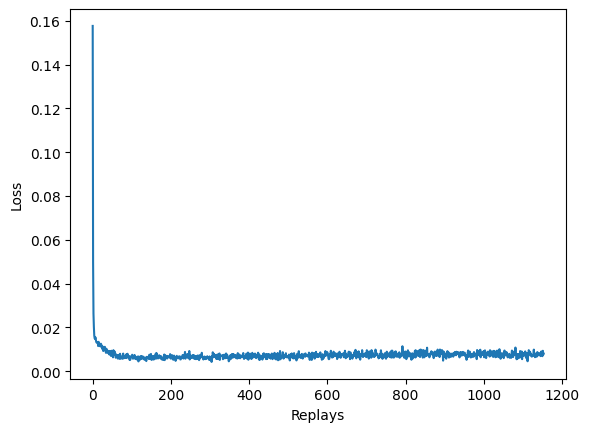

In [7]:
agent, optimizer, criterion = supply_model(
    load_if_exists=True, 
    agent_name=BASELINE,
    optimizer_type="SGD"
)
agent.prep_cosine_anneal(0.0, 1.0, NUM_EPISODES)
environment = TicTacToeGame(DEVICE, None, OPPONENT_LEVEL.NAIVE)
reward_history = train_agent(
    agent,
    environment,
    NUM_EPISODES,
    optimizer,
    criterion,
    DEVICE,
    MODEL_PATH,
    model_name = NAIVE,
    save_every = 2000,
    # epsilon_min_value = 0.30,
    # epsilon_max_value = 0.75,
)
agent.print_loss_history()

In [ ]:
compare_to_naive(f"{OPTIMAL}-2K")
compare_to_optimal(f"{OPTIMAL}-2K")

In [ ]:
compare_to_naive(f"{OPTIMAL}-4K")
compare_to_optimal(f"{OPTIMAL}-4K")

In [ ]:
compare_to_naive(f"{OPTIMAL}-6K")
compare_to_optimal(f"{OPTIMAL}-6K")

In [ ]:
compare_to_naive(f"{OPTIMAL}-8K")
compare_to_optimal(f"{OPTIMAL}-8K")

In [ ]:
compare_to_naive(f"{OPTIMAL}-10K")
compare_to_optimal(f"{OPTIMAL}-10K")